In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [52]:
df = pd.read_csv("./datos/Internet_Municipio.csv")
df

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2016,1,50,META,50606,RESTREPO,490,17648,"2,78"
1,2016,2,15,BOYACÁ,15518,PAJARITO,43,2395,"1,80"
2,2020,3,25,CUNDINAMARCA,25489,NIMAIMA,43,3808,"1,13"
3,2020,3,73,TOLIMA,73030,AMBALEMA,38,6752,"0,56"
4,2017,1,5,ANTIOQUIA,5690,SANTO DOMINGO,337,12426,"2,71"
...,...,...,...,...,...,...,...,...,...
35573,2016,4,66,RISARALDA,66682,SANTA ROSA DE CABAL,9460,77296,"12,24"
35574,2020,3,25,CUNDINAMARCA,25286,FUNZA,23052,101420,"22,73"
35575,2018,2,5,ANTIOQUIA,5091,BETANIA,512,10323,"4,96"
35576,2020,4,15,BOYACÁ,15673,SAN MATEO,36,3422,"1,05"


In [53]:
top_municipios = df.groupby('MUNICIPIO')['No. ACCESOS FIJOS A INTERNET'].sum().sort_values(ascending=False)
print(top_municipios)

MUNICIPIO
BOGOTÁ, D.C.       64108998
MEDELLÍN           20476553
CALI               16039303
BARRANQUILLA        8032399
CARTAGENA           5192292
                     ...   
YAVARATÉ                 22
LA GUADALUPE             20
PANA PANA                19
PAPUNAHUA                18
MIRITI - PARANÁ           2
Name: No. ACCESOS FIJOS A INTERNET, Length: 1036, dtype: int64


In [54]:
top_municipios = df.groupby('MUNICIPIO')['POBLACIÓN DANE'].sum().sort_values(ascending=False)
print(top_municipios)

MUNICIPIO
BOGOTÁ, D.C.       243285568
MEDELLÍN            79257567
CALI                71758170
BARRANQUILLA        39839132
CARTAGENA           31977708
                     ...    
YAVARATÉ               18221
PUERTO ALEGRÍA         11424
LA GUADALUPE            4824
PAPUNAHUA               4743
MIRITI - PARANÁ         3720
Name: POBLACIÓN DANE, Length: 1036, dtype: int64


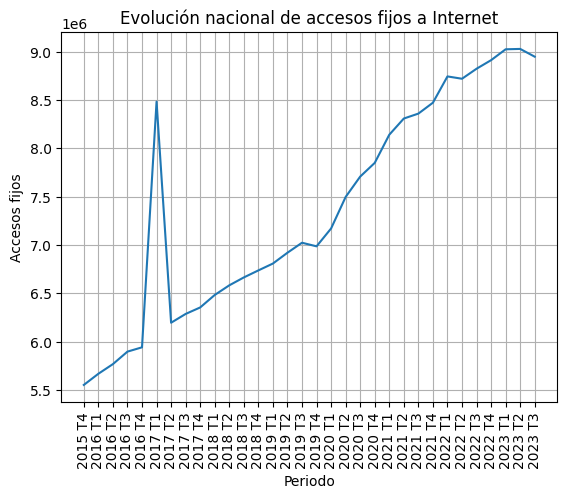

In [55]:
df['PERIODO'] = df['AÑO'].astype(str) + ' T' + df['TRIMESTRE'].astype(str)

df_total = df.groupby(['AÑO', 'TRIMESTRE'])[['No. ACCESOS FIJOS A INTERNET']].sum().reset_index()


df_total['Periodo'] = df_total['AÑO'].astype(str) + ' T' + df_total['TRIMESTRE'].astype(str)
plt.plot(df_total['Periodo'], df_total['No. ACCESOS FIJOS A INTERNET'])
plt.xticks(rotation=90)
plt.title("Evolución nacional de accesos fijos a Internet")
plt.xlabel("Periodo")
plt.ylabel("Accesos fijos")
plt.grid(True)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7418447df380>,
 'caps': [<matplotlib.lines.Line2D at 0x7418447dc620>,
 'boxes': [<matplotlib.lines.Line2D at 0x7418447dee70>],
 'medians': [<matplotlib.lines.Line2D at 0x7418447dd880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7418447dc080>],
 'means': []}

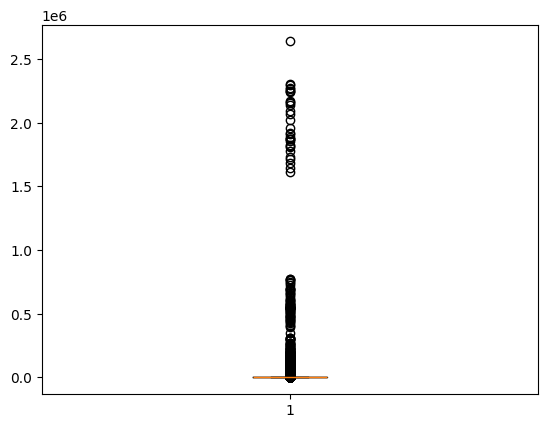

In [56]:
plt.boxplot(df['No. ACCESOS FIJOS A INTERNET'])

In [57]:
Q1 = df['No. ACCESOS FIJOS A INTERNET'].quantile(0.25)
Q3 = df['No. ACCESOS FIJOS A INTERNET'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['No. ACCESOS FIJOS A INTERNET'] >= limite_inferior) & (df['No. ACCESOS FIJOS A INTERNET'] <= limite_superior)]


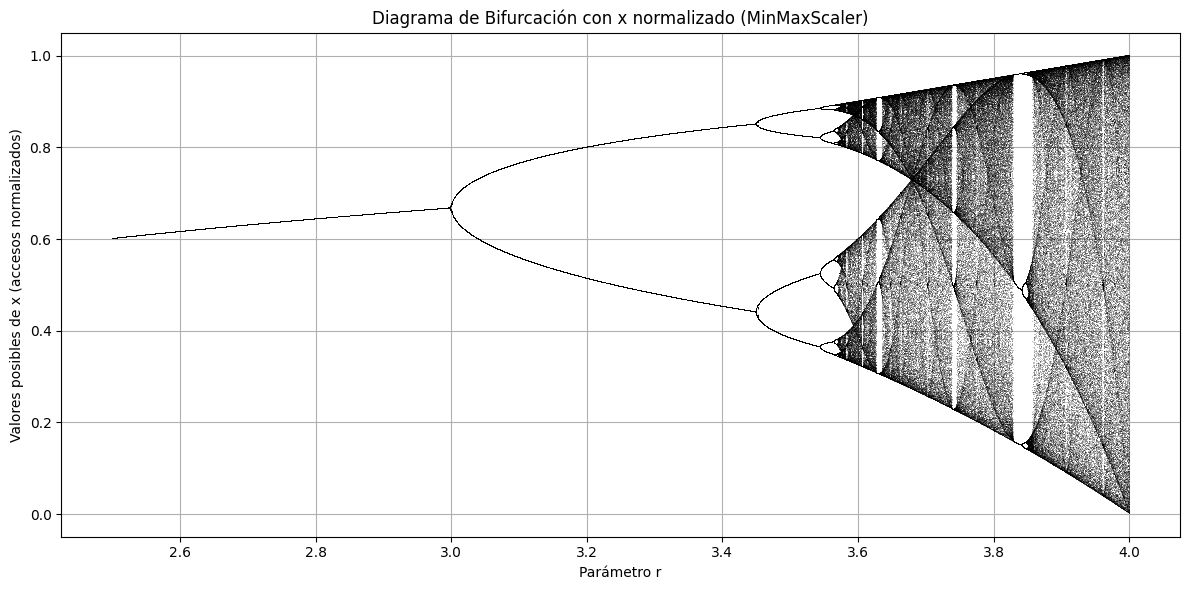

In [58]:

np.random.seed(42)
data = {
    'No. ACCESOS FIJOS A INTERNET': np.random.randint(1, 100000, size=35578)
}
df = pd.DataFrame(data)

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df[['No. ACCESOS FIJOS A INTERNET']]).flatten()

x = x_scaled[:10000]
r_values = np.linspace(2.5, 4.0, len(x))

n_iterations = 1000
last = 100

r_plot = []
x_plot = []

for i in range(n_iterations):
    x = r_values * x * (1 - x)
    if i >= (n_iterations - last):
        r_plot.extend(r_values)
        x_plot.extend(x)

plt.figure(figsize=(12, 6))
plt.plot(r_plot, x_plot, ',k', alpha=0.25)
plt.title("Diagrama de Bifurcación con x normalizado (MinMaxScaler)")
plt.xlabel("Parámetro r")
plt.ylabel("Valores posibles de x (accesos normalizados)")
plt.grid(True)
plt.tight_layout()
plt.show()
